<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Augusto Tagle Montes


### **Link de repositorio de GitHub:** https://github.com/atagle123/Evaluaciones_MDS7202


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Columna invoice: Id de la venta esta cargada como dato categorico.  
Stock code: Código del producto que se compra esta cargada como dato categorico.  
Description: Descripción del producto, es un string.  
Quantity: Cantidad de producto comprado, corresponde a un número entero.  
InvoiceDate: Fecha de la venta, corresponde a una estampa de tiempo.  
Price: Corresponde a un float, es el precio del producto comprado.  
Customer ID: Es un Id que identifica a cada cliente, esta cargado como dato categorico.  
Country: Es el pais de la venta, corresponde a un string.  


## 1.2 Análisis Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

Con analisis univariable se refiere a hacer el analisis de cada columna del dataset por separado, por ejemplo ver la distribucion de los datos de cada columna. Por otro lado, con analisis multivariado se refiere a como se relacionan las variables entre si, en otras palabras se estudia mas de una columna a la vez, por ejemplo hacer agregaciones y luego ver las distribuciones o ver las correlaciones entre variables. Finalmente, el analisis de datos faltantes se refiere a ver la cantidad de valores faltantes por columna del dataset.  
Hacer estos analisis otorga una mejor comprensión de los datos y tambien ayuda a ver si es necesaria una limpieza de los datos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [4]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [5]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

En esta serie se puede ver que hay algunos precios que estan bastante alejados de la mayoría de los datos (outliers), esto se puede deber a compras anómalas o a un error en los datos. Sin embargo, en la distribución de los datos sin outliers, se puede ver que los precios distribuyen similar a una lognormal, con una media cercana a 4.6. Se debe notar tambien, que existen 3 valores negativos en la serie, esto no tiene sentido y puede ser un error en los datos. Por otro lado, las estadisticas nos indican que no hay valores faltantes, por lo que el único procesamiento que se le debe hacer a los datos es eliminar outliers. 

In [6]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

En este análisis tenemos la distribucion de ventas por fecha, en donde se puede ver que hay una tendencia a que las ventas aumenten para diciembre, probablemente por navidad, y disminuyan para Enero. Se debe notar que se tienen datos correspondientes a un poco mas de un año.

In [7]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

En este análisis se puede ver la distribución de los datos correspondientes a la cantidad de cada compra. Como primera observación se debe notar que tenemos datos negativos, lo cual no debería ocurrir. Por otro lado no tenemos datos faltantes, lo que facilitará el proceso de limpieza de datos.  
Al analizar la distribución de los datos, se debe notar que la media esta alrededor de las 10 unidades por compra, y se podría decir que los datos distribuyen similar a una lognormal. En la limpieza de datos se deberan eliminar outliers. 

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [8]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

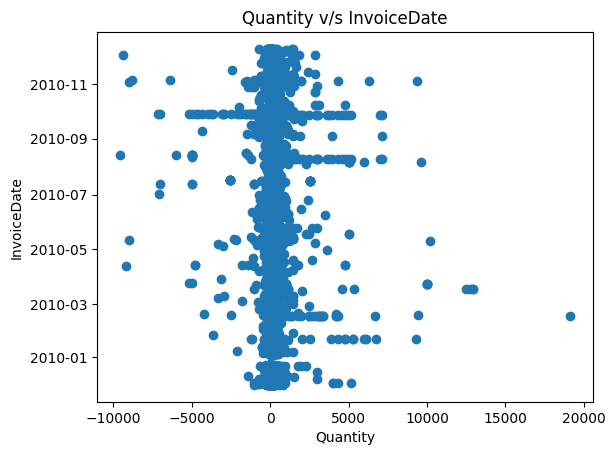

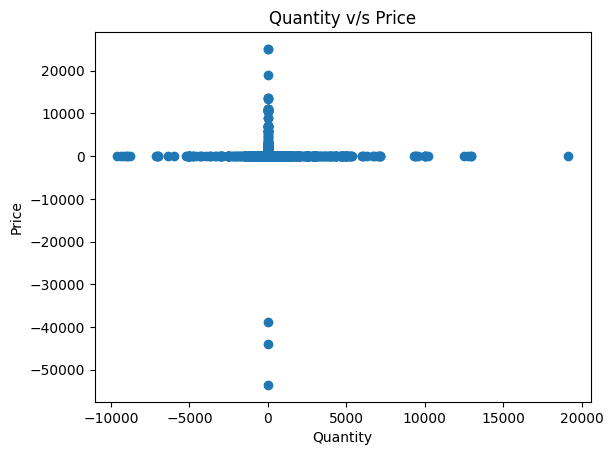

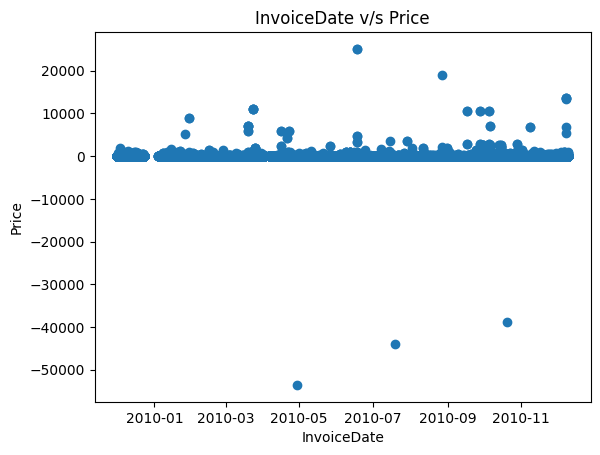

## Correlation:

C:\Users\augus\AppData\Local\Temp\ipykernel_12852\2390459975.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

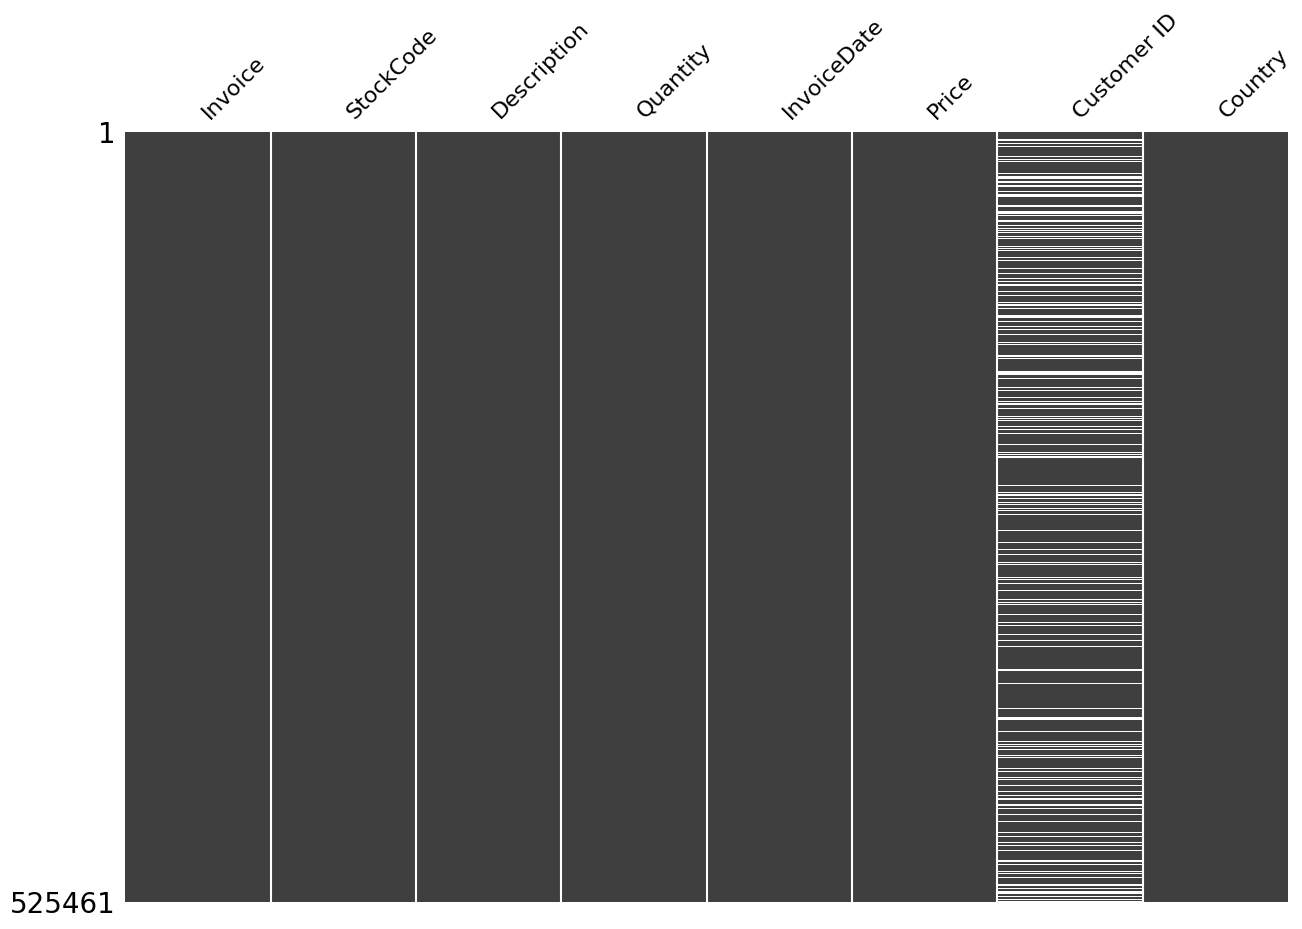

In [9]:
profile_df(df_retail)

En este análisis se puede notar que casi no hay correlación entre la variable cantidad y precio, lo que probablemente indica que el precio se refiere al precio unitario del articulo. Tambien se debe notar que las cantidades y los precios estan distribuidos de manera uniforme al graficarlos por fecha, aunque hay algunos peaks anómalos. Tambien se puede apreciar la gran cantidad de valores negativos que hay en cantidad, lo que puede corresponder a una devolución o a un error en los datos. Finalmente debemos notar que la única columna que tiene valores faltantes es la columna correspondiente a CustomerId, la que no tiene ningun problema si la dejamos asi, ya que hay muchos clientes que quizas no quieren identificarse en la tienda de retail.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [10]:
def clean_data(df):
    df = df[(df['Quantity'] >= 0)]    # Se eliminan valores negativos
    df = df[(df['Price'] >= 0)]       # Se eliminan valores negativos
    df = df.loc[(np.abs(stats.zscore(df["Quantity"])) < 3)] # Se eliminan outliers (con mas de 3 desviaciones estandar de la media)
    df = df.loc[(np.abs(stats.zscore(df["Price"])) < 3)]    # Se eliminan outliers (con mas de 3 desviaciones estandar de la media)
    return(df)

En la función se deciden limpiar outliers y los valores negativos en las ventas. Los datos faltantes en Customer ID no se consideran relevantes, no hay problema con que hayan ventas en donde un cliente no se haya identificado.

## Bivariant Analysis:

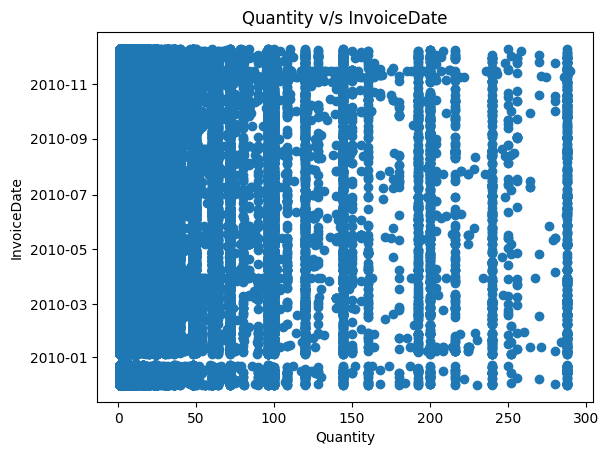

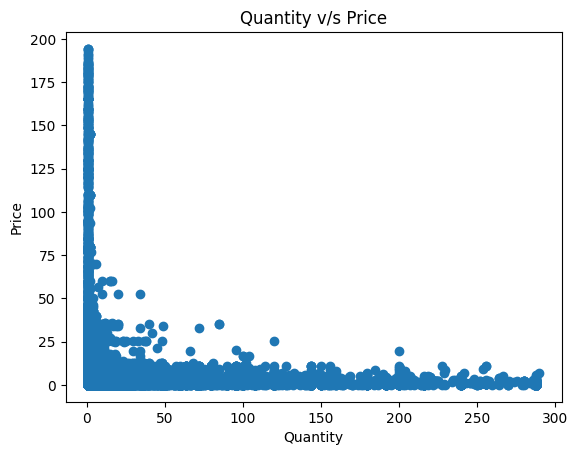

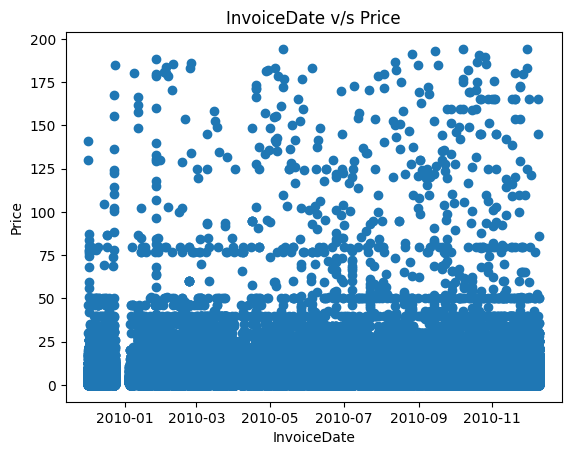

## Correlation:

C:\Users\augus\AppData\Local\Temp\ipykernel_12852\2390459975.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

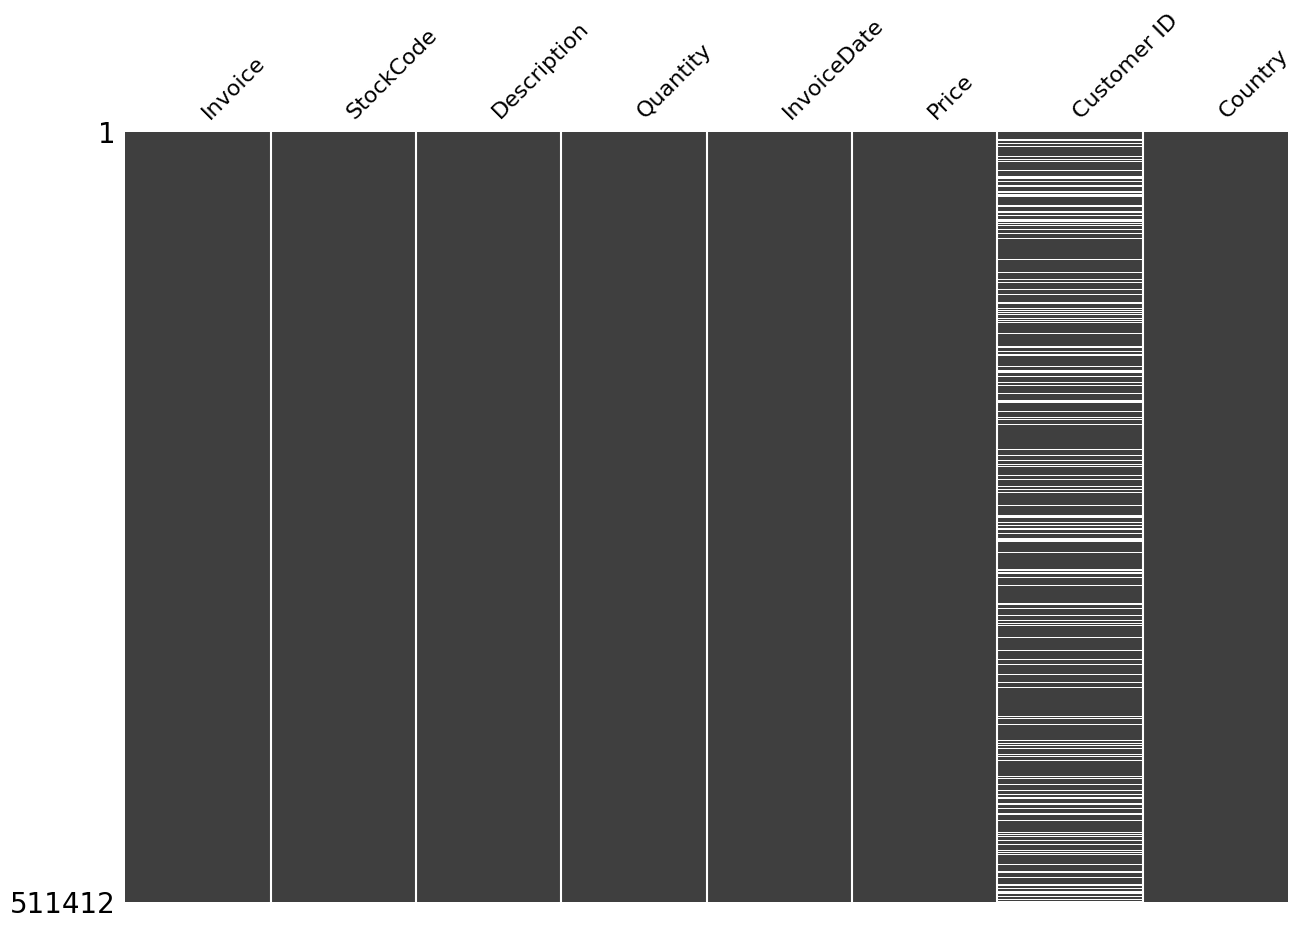

In [11]:
profile_df(clean_data(df_retail))

Luego de realizar la limpieza de datos y de comparar los analisis exploratorios, podemos ver que los valores negativos ya no estan, y se logra apreciar de mejor manera los gráficos de dos variables.  
Tambien se debe notar que la correlación entre precio y cantidad cambio ligeramente, donde antes era casi 0, ahora es -0.13. Finalmente las columnas con datos faltantes no varian, ya que Customer ID no se considera necesario para el analisis de datos, si se eliminaran los datos sin customer ID probablemente se estarian sesgando los datos hacia los clientes que si estan inscritos. Por lo que esa columna se deja intacta.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [12]:
ventas_producto = df_retail.groupby('Description').apply(lambda x: pd.Series({'Cantidad Vendida': x['Quantity'].sum(),'Ingresos': (x['Quantity'] * x['Price']).sum()})).reset_index().sort_values(by="Ingresos",ascending=False)[:30]
fig = px.bar(ventas_producto, x='Description', y=['Cantidad Vendida', 'Ingresos'],
             title=' Top 30 productos por ganancias',
             labels={'value': 'Valor', 'variable': 'Variable',"Description":"Producto"},
             barmode='group')
fig.show()

Se puede observar que los productos que generan mas ganancias para la tienda no necesariamente son los que mas se venden, aunque se puede ver cierta tendencia. Tambien puede observar que hay un grupo de productos, que generan notoriamente mas ganancias que otros.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [13]:
def plot_ventas(dataframe):
    dataframe['Date'] = dataframe['InvoiceDate'].dt.strftime('%m-%d-%Y')   # Formato mes/dia/año
    sales=dataframe.groupby('Date')["Quantity"].sum()
    sales.sort_index(ascending=False).plot()
    plt.xticks(rotation=45)
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad ventas")
    plt.title("Cantidad de ventas por día")
    plt.show()
    pass

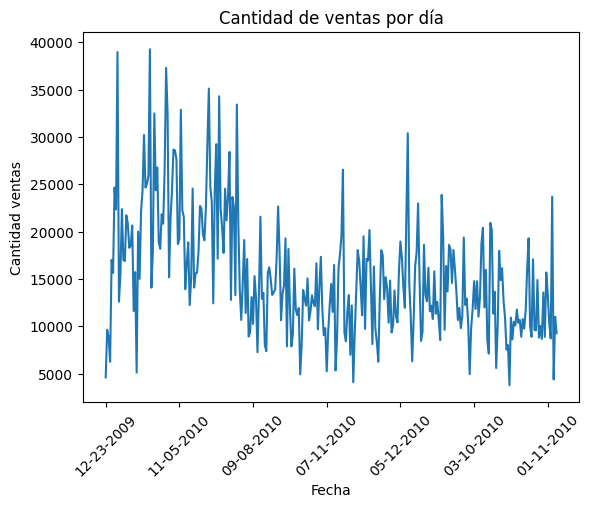

In [14]:
plot_ventas(clean_data(df_retail))

Se puede observar que hay una cierta periodicidad de los datos, y que hay ciertos peaks bastante claros. Que pueden corresponder a fechas de alta demanda de productos como un fin de semana (en el caso de tienda de retail) y en el caso de los peaks mas grandes, alguna fecha relevante como Navidad o el dia del niño. Tambien se puede notar que justo despues de Navidad hay una baja en las ventas.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>